In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('news_articles.csv')
df

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


## feature engineering

In [3]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
features_nan

['text',
 'language',
 'site_url',
 'main_img_url',
 'type',
 'label',
 'title_without_stopwords',
 'text_without_stopwords',
 'hasImage']

In [4]:
for feature in features_nan:
    print(feature,':',df[feature].isnull().sum())
#there are much features with only 1 or 2 nan values which we will be dropping
#but in text and text_without_stopwords there is approx 50 nan values since we cant replace those with any value and it might be possible that there was no stop words in text so we will be dropping those rows


text : 46
language : 1
site_url : 1
main_img_url : 1
type : 1
label : 1
title_without_stopwords : 2
text_without_stopwords : 50
hasImage : 1


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2045
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2045 non-null   object 
 1   published                2045 non-null   object 
 2   title                    2045 non-null   object 
 3   text                     2045 non-null   object 
 4   language                 2045 non-null   object 
 5   site_url                 2045 non-null   object 
 6   main_img_url             2045 non-null   object 
 7   type                     2045 non-null   object 
 8   label                    2045 non-null   object 
 9   title_without_stopwords  2045 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2045 non-null   float64
dtypes: float64(1), object(11)
memory usage: 207.7+ KB


## Data analysis

In [8]:
for feature in df.columns:
    print(feature,':', len(df[feature].unique()))

author : 485
published : 1956
title : 1755
text : 1936
language : 5
site_url : 68
main_img_url : 1181
type : 8
label : 2
title_without_stopwords : 1752
text_without_stopwords : 1936
hasImage : 2


<AxesSubplot:>

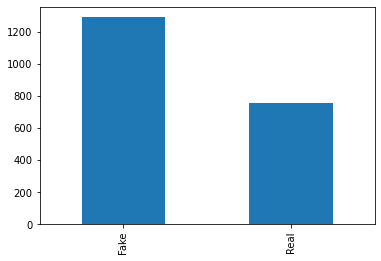

In [9]:
df['label'].value_counts().plot.bar()
#majority we have got the fake news

<AxesSubplot:xlabel='label', ylabel='count'>

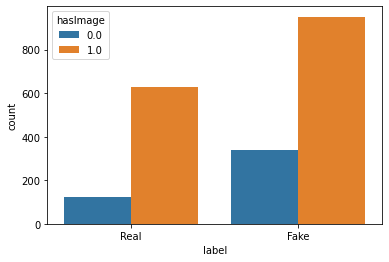

In [10]:
sns.countplot(x='label',hue='hasImage',data=df)
#the news which are fake have image as well

<AxesSubplot:>

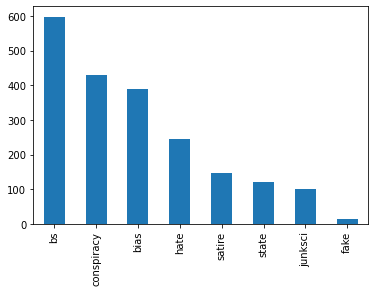

In [11]:
df['type'].value_counts().plot.bar()
#bs(i.e=bullshit) article type has greater values and fake is least

<AxesSubplot:xlabel='type', ylabel='count'>

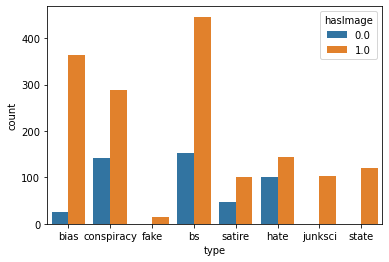

In [12]:
sns.countplot(x='type',hue='hasImage',data=df)
#bullshit news have greater images

<AxesSubplot:>

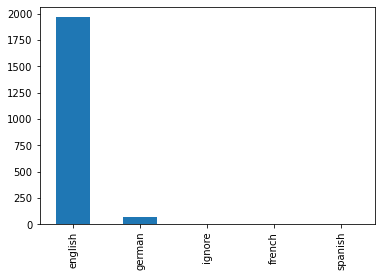

In [13]:
df['language'].value_counts().plot.bar()
#all majority of articles are in english

<AxesSubplot:>

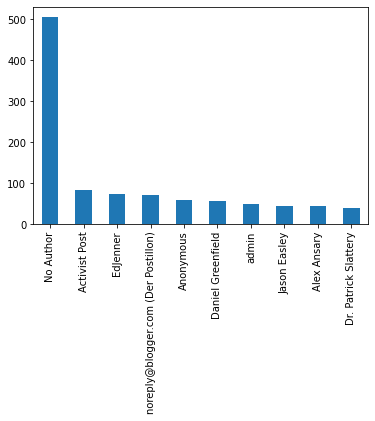

In [14]:
df['author'].value_counts().sort_values(ascending=False).head(10).plot.bar()
#majority articles published are without any author

<AxesSubplot:>

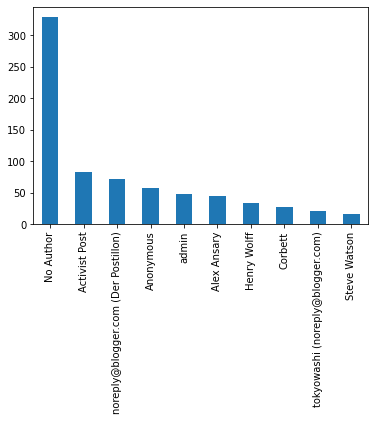

In [15]:
fake_df=df[df['label']=='Fake']
fake_df['author'].value_counts().sort_values(ascending=False).head(10).plot.bar()
#no author has been given in fake articles

<AxesSubplot:>

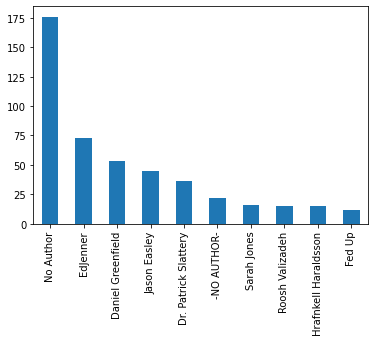

In [16]:
fake_df=df[df['label']=='Real']
fake_df['author'].value_counts().sort_values(ascending=False).head(10).plot.bar()
#in real news majority have no author but here are some educated people as well

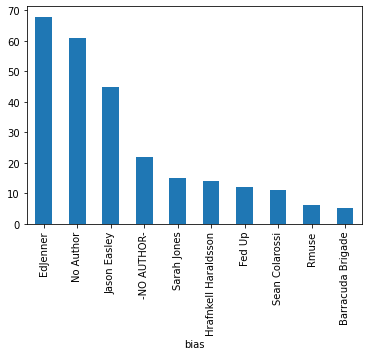

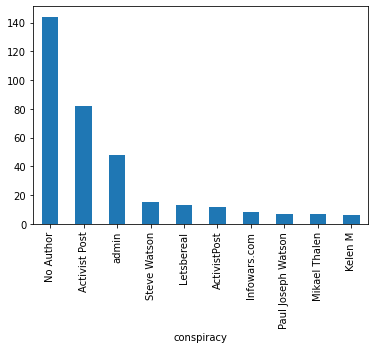

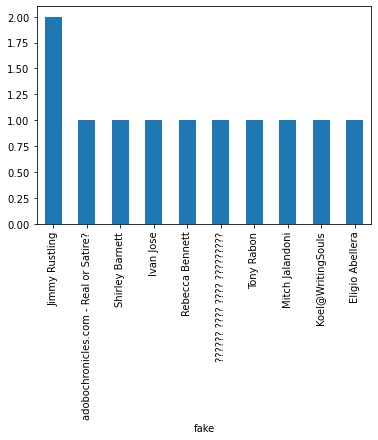

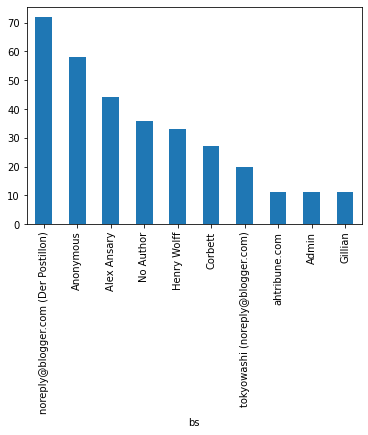

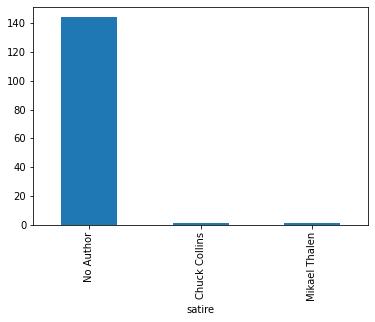

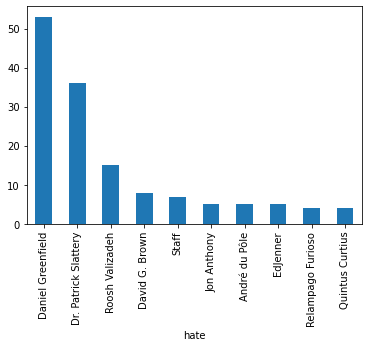

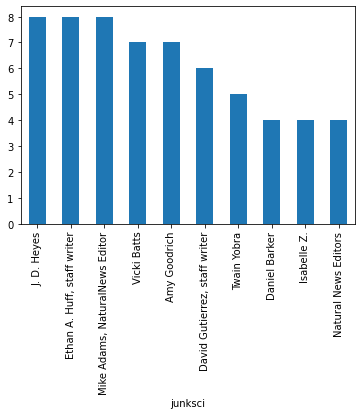

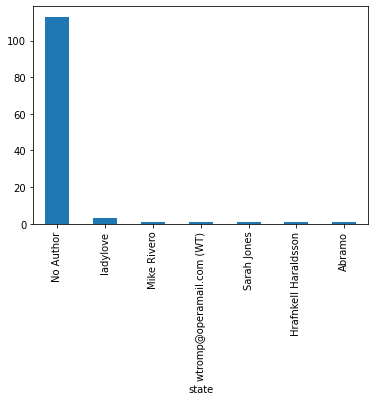

In [17]:
for feature in df['type'].unique():
    type_df=df[df['type']==feature]
    type_df['author'].value_counts().sort_values(ascending=False).head(10).plot.bar()
    plt.xlabel(feature)
    plt.show()

<AxesSubplot:>

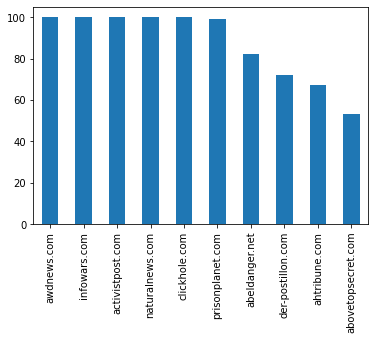

In [18]:
#fake news website urls
fake_df=df[df['label']=='Fake']
fake_df['site_url'].value_counts().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:>

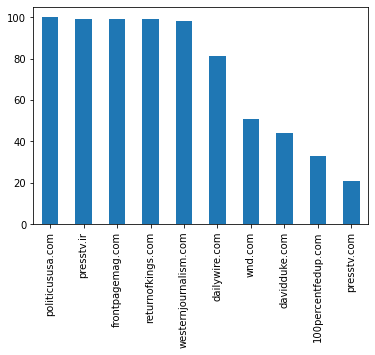

In [19]:
#Real news website urls
fake_df=df[df['label']=='Real']
fake_df['site_url'].value_counts().sort_values(ascending=False).head(10).plot.bar()

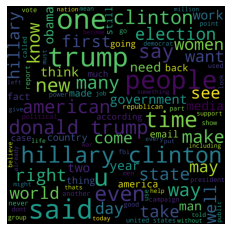

In [20]:
#now we try to analyze the words which were most used in title and text
##pip install wordcloud
from wordcloud import WordCloud 
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=2000, height=2000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

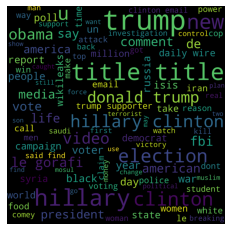

In [21]:
from wordcloud import WordCloud 
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=2000, height=2000)
wc.generate(' '.join(df['title_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
#data=df.iloc[:,10:]
#data.drop(columns=['hasImage'],axis=1,inplace=True)
#it read the lines and jitne bhi unique words thaay isne unko rows and banadia and no. of lines is in y axis
#vec = CountVectorizer().fit(new_data['text_without_stopwords'])
#bag_of_words = vec.transform(new_data['text_without_stopwords'])
#arr=(bag_of_words.toarray())
#arr[4]

In [23]:
#it means ka har feature pe jao or uska sum nikal lo for each line
#sum of words pe mere pass har word ka sum jo wo har line ma aya hua ha
#sum_words=bag_of_words.sum(axis=0)
#(sum_words[0,0])
#it is an type of an encoder a random value is selected and given to the words or feature
#vec.vocabulary_.items()

In [24]:
##eg:
#corpus = [
#'This is the first document.',
#'This document is the second document.',
#'And this is the third one.',
#'Is this the first document?']
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(corpus)
#vectorizer.vocabulary_.items()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [26]:
def get_top_n_words(corpus, n=None):
    #it read the lines and jitne bhi unique words thaay isne unko rows and banadia and no. of lines is in y axis
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    #it means ka har feature pe jao or uska sum nikal lo for each line
    #sum of words pe mere pass har word ka sum jo wo har line ma aya hua ha
    sum_words = bag_of_words.sum(axis=0) 
    #it is an type of an encoder a random value is selected and given to the words or feature
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
record=get_top_n_words(df['text_without_stopwords'], 10)
record_title=get_top_n_words(df['title_without_stopwords'], 10)

<AxesSubplot:xlabel='word'>

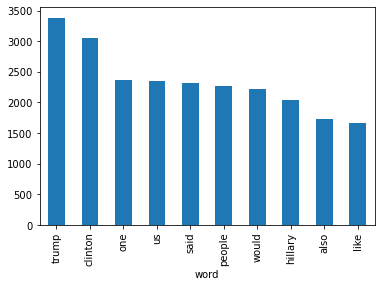

In [28]:
#top 10 unigrams
dataset=pd.DataFrame(record, columns=['word','count'])
dataset.groupby('word')['count'].sum().sort_values(ascending=False).plot.bar()
#in the text_without_stopword trump has the highes count in it

<AxesSubplot:xlabel='word'>

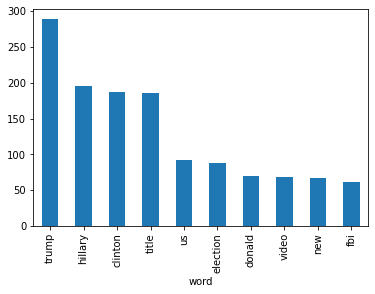

In [29]:
dataset=pd.DataFrame(record_title, columns=['word','count'])
dataset.groupby('word')['count'].sum().sort_values(ascending=False).plot.bar()
#trump as a title was having greater count and election has also been found in our title

In [30]:
##bigrams
def get_top_n_bigram(corpus, n=None):
    #becz we want the bigrams we gave the parameter of 2,2
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [31]:
text_bi=get_top_n_bigram(df['text_without_stopwords'],10)
title_bi=get_top_n_bigram(df['title_without_stopwords'],10)

<AxesSubplot:xlabel='word'>

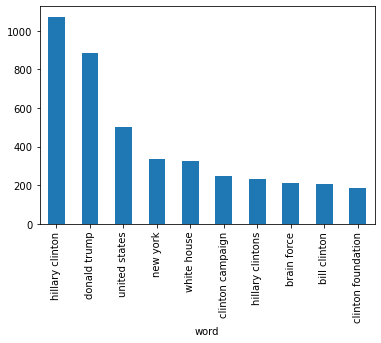

In [32]:
#text_bi
dataset=pd.DataFrame(text_bi, columns=['word','count'])
dataset.groupby('word')['count'].sum().sort_values(ascending=False).plot.bar()
#text like donald trump, whithouse, usa and especially hillary clington has topped

<AxesSubplot:xlabel='word'>

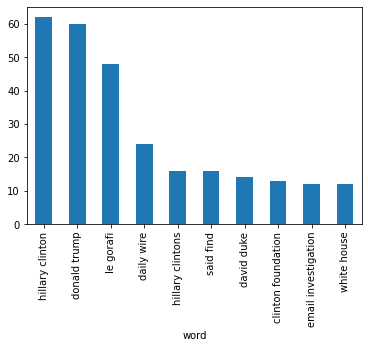

In [33]:
#title_bi
dataset=pd.DataFrame(title_bi, columns=['word','count'])
dataset.groupby('word')['count'].sum().sort_values(ascending=False).plot.bar()

## Model

In [69]:
#mapping the string to numerical 
dict_1={'bias':1,'conspiracy':2,'fake':3,'bs':4,'satire':5,'hate':6,'junksci':7,'state':8}
df['type']=df['type'].map(dict_1)

In [70]:
#dependent and independent
X=df.drop(columns=['type'],axis=1)
y=df.type

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer
# list of text documents
# create the transform
vectorizer = HashingVectorizer(n_features=2045)
# encode document
vector = vectorizer.transform(X)
# summarize encoded vector
X_transform=vector.toarray().reshape(2045,11)

In [37]:
d=pd.DataFrame(data=X_transform, columns=X.columns)


In [38]:
for feature in d.columns:
    print(feature,':',len(d[feature].unique()))

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_transform,y, test_size=0.3, random_state=0)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 4000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,30)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 10,12,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 8, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [44]:
k_cv=KFold(n_splits=10,shuffle=True, random_state=100)

In [45]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=k_cv,verbose=2,
                               random_state=100,n_jobs=1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred=rf.predict(X_test)
print(confusion_matrix(y_test,pred))
print("Accuracy Score {}".format(accuracy_score(y_test,pred)))
print("Classification report: {}".format(classification_report(y_test,pred)))

[[  0   0   0 123   0   0   0   0]
 [  0   0   0 135   0   0   0   0]
 [  0   0   0   7   0   0   0   0]
 [  0   0   0 178   0   0   0   0]
 [  0   0   0  35   0   0   0   0]
 [  0   0   0  66   0   0   0   0]
 [  0   0   0  33   0   0   0   0]
 [  0   0   0  37   0   0   0   0]]
Accuracy Score 0.2899022801302932
Classification report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00       135
           3       0.00      0.00      0.00         7
           4       0.29      1.00      0.45       178
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00        66
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        37

    accuracy                           0.29       614
   macro avg       0.04      0.12      0.06       614
weighted avg       0.08      0.29      0.13       614



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
